In [ ]:
import pandas as pd
import geopandas as gp
from shapely.geometry import Point
import datetime as dt
from pathlib import Path
import seaborn as sns
import colorcet as cc
from matplotlib import pyplot as plt
import matplotlib as mpl
import requests
from hnl_fire_data import firetallytools as ft
from importlib import reload

In [ ]:
reload(ft)

<module 'hnl_fire_data.firetallytools' from '/Users/chris/Projects/FiWePs/hnl-fire-data/src/hnl_fire_data/firetallytools.py'>

In [ ]:
sns.set_theme('paper')
sns.set_style('whitegrid')

In [ ]:
OVERWRITE = False
DATADIR = Path().absolute().parents[1]  / 'data/AICC_reports'
testfn = 'AK_SituationReportExport_20250702.xlsx'
DATADIR

PosixPath('/Users/chris/Projects/FiWePs/data/AICC_reports')

In [ ]:
pd.read_excel(DATADIR / testfn)

,OBJECTID,Fire Number,Unique Fire ID,Incident Name,Acres,Fire Cause,Incident Type,Management Option,Protecting Org,Protecting Office,...,DOF Code,USFS Code,Complex,Last updated,Status,Personnel,Narrative Date,Narrative,Latitude,Longitude
0,1,372.0,2025-AKGAD-000372,Lynx,0.10,Undetermined,WF-Wildfire,Modified (Jul 10),AFS,Galena Zone (GAD),...,NaN,PDS469,NaN,7/2/2025 23:17,Unstaffed/Uncontained,0.0,7/2/2025,No narrative.,67.013000,-156.673050
1,2,370.0,2025-AKFAS-511370,Healy Road Coal Seam,3.00,Natural,WF-Wildfire,Full,DOF,Fairbanks Area (FAS),...,7.351137e+09,PNS457,NaN,7/2/2025 16:26,Unstaffed/Uncontained,0.0,7/2/2025,"While conducting a reconnaissance mission, N64...",63.861167,-148.761833
2,3,371.0,2025-AKKKS-503371,Sandra,0.01,Human,WF-Wildfire,Critical,DOF,Kenai-Kodiak Area (KKS),...,7.350337e+09,PNS45S,NaN,7/2/2025 19:06,Staffed/Contained,4.0,7/2/2025,On 7/2/25 @ 1502 KESA dispatched resources to ...,59.742817,-151.266017
3,4,368.0,2025-AKFAS-511368,Farmers Market,0.10,Natural,WF-Wildfire,Critical,DOF,Fairbanks Area (FAS),...,7.351137e+09,PNS44B,NaN,7/2/2025 16:36,Unstaffed/Contained,0.0,7/2/2025,"At approximately 1200, FECC reported an active...",64.863134,-147.782293
4,5,369.0,2025-AKTAS-513369,F/A Big Creek,0.00,Undetermined,FA-False Alarm,Limited,DOF,Tok Area (TAS),...,7.351337e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.529900,-141.431900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,404,NaN,2025-AKMSS-250001,CY25 Sunset RX,0.01,Human,RX-Prescribed Fire,Critical,DOF,Mat-Su Area (MSS),...,NaN,NaN,NaN,7/2/2025 06:41,NaN,0.0,7/2/2025,No narrative.,61.660133,-149.602283
404,405,NaN,2025-AKFAS-250712,2025 Nenana Ridge RX,0.10,Human,RX-Prescribed Fire,Full,DOF,Fairbanks Area (FAS),...,NaN,NaN,NaN,7/2/2025 06:28,NaN,0.0,7/2/2025,No narrative.,64.653617,-148.690000
405,406,NaN,2025-AKKKS-250003,CY25 Wharf Ave RX,0.01,Human,RX-Prescribed Fire,Critical,DOF,Kenai-Kodiak Area (KKS),...,NaN,NaN,NaN,7/2/2025 06:41,NaN,0.0,7/2/2025,No narrative.,60.487802,-150.866415
406,407,NaN,2025-AKKKS-250001,CY25 Morgan''s Landing RX,8.00,Human,RX-Prescribed Fire,Critical,DOF,Kenai-Kodiak Area (KKS),...,7.323600e+09,NaN,NaN,7/2/2025 06:38,NaN,0.0,7/2/2025,No narrative.,60.503372,-150.863667


In [ ]:
URLtemplate_A = "https://fire.ak.blm.gov/content/aicc/Previous%20Situation%20Reports/2025%20Situtation%20Report%20Exports/"
fntemplate = 'AK_SituationReportExport_'

In [ ]:
startdatestr = '20250415'
lastdate = ft.download_reports(startdatestr=startdatestr,
                               URLtemplate=URLtemplate_A,
                               fntemplate=fntemplate,
                               outdir=DATADIR,
                               overwrite=False)

File not present on server: https://fire.ak.blm.gov/content/aicc/Previous%20Situation%20Reports/2025%20Situtation%20Report%20Exports/AK_SituationReportExport_20250415.xlsx
File not present on server: https://fire.ak.blm.gov/content/aicc/Previous%20Situation%20Reports/2025%20Situtation%20Report%20Exports/AK_SituationReportExport_20250416.xlsx
File not present on server: https://fire.ak.blm.gov/content/aicc/Previous%20Situation%20Reports/2025%20Situtation%20Report%20Exports/AK_SituationReportExport_20250417.xlsx
File not present on server: https://fire.ak.blm.gov/content/aicc/Previous%20Situation%20Reports/2025%20Situtation%20Report%20Exports/AK_SituationReportExport_20250418.xlsx
File not present on server: https://fire.ak.blm.gov/content/aicc/Previous%20Situation%20Reports/2025%20Situtation%20Report%20Exports/AK_SituationReportExport_20250419.xlsx
File not present on server: https://fire.ak.blm.gov/content/aicc/Previous%20Situation%20Reports/2025%20Situtation%20Report%20Exports/AK_Situ

In [ ]:
all_updates = ft.assemble_dataframe(DATADIR, fntemplate=fntemplate)
all_updates

,Fire Number,Unique Fire ID,Incident Name,Acres,Fire Cause,Incident Type,Management Option,Protecting Org,Protecting Office,Owner ID,...,Personnel,Narrative Date,Narrative,Latitude,Longitude,reportdate,Discovery date,Control date,Out date,Protecting Office Label
37,5.0,2025-AKMSS-501005,Bergman,0.7,Human,WF-Wildfire,Critical,DOF,Mat-Su Area,Private,...,0.0,2025-03-25 00:00:00,Forestry personnel walked the fire and found n...,61.548699,-149.015612,2025-04-22,2025-03-21 12:32:42,2025-03-21 17:39:00,2025-03-25 14:41:00,MSS
27,14.0,2025-AKTNF-531014,Eagle,0.1,Human,NS-Non-Statistical/Other,Critical,USFS,Tongass N.F.,Private,...,0.0,2025-04-04 00:00:00,Fire has been called out. No further reports e...,59.243222,-135.500444,2025-04-22,2025-03-30 17:00:00,2025-03-30 18:00:00,2025-04-04 07:10:00,TNF
28,13.0,2025-AKKKS-503013,Hoyt,0.5,Human,WF-Wildfire,Critical,DOF,Kenai-Kodiak Area,Private,...,0.0,2025-04-04 00:00:00,"Forestry personnel checked on the Hoyt fire, f...",60.642222,-151.312472,2025-04-22,2025-03-30 13:14:00,2025-03-30 15:27:00,2025-04-04 16:20:00,KKS
29,12.0,2025-AKMSS-501012,Ridgewood,0.1,Human,WF-Wildfire,Critical,DOF,Mat-Su Area,Private,...,0.0,2025-03-30 00:00:00,Forestry responded with one engine to a Matcom...,61.602573,-149.505564,2025-04-22,2025-03-30 12:00:42,2025-03-30 12:12:00,2025-03-30 13:33:00,MSS
31,10.0,2025-AKTNF-531010,Sawmill,0.1,Human,NS-Non-Statistical/Other,Critical,USFS,Tongass N.F.,Private,...,0.0,2025-04-03 00:00:00,Fire Has been called out. No further reports e...,59.236111,-135.470806,2025-04-22,2025-03-28 08:30:00,2025-03-28 10:30:00,2025-04-02 19:32:00,TNF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,346.0,2025-AKGAD-000346,Taluk,7.7,Natural,WF-Wildfire,Limited,AFS,Galena Zone,BLM,...,0.0,6/30/2025,Acreage updated due to better GIS mapping.,69.446367,-155.383433,2025-07-15,NaT,NaT,NaT,GAD
111,347.0,2025-AKGAD-000347,Stoat,745.8,Natural,WF-Wildfire,Limited,AFS,Galena Zone,BLM,...,0.0,6/30/2025,At 1730 the fire was flown by zone surveillanc...,66.596683,-157.822100,2025-07-15,NaT,NaT,NaT,GAD
110,348.0,2025-AKKKS-503348,Bridge Access,0.1,Human,WF-Wildfire,Critical,DOF,Kenai-Kodiak Area,City,...,0.0,7/10/2025,Fire was called out 7/3 at 1506.,60.556241,-151.240627,2025-07-15,NaT,NaT,NaT,KKS
118,340.0,2025-AKGAD-000340,Huslia Dump,0.1,Human,DF-Debris/Product Fire,Full,AFS,Galena Zone,ANCSA,...,0.0,6/25/2025,Agency Helicopter 353MH was working in the are...,65.682000,-156.337500,2025-07-15,NaT,NaT,NaT,GAD


In [ ]:
all_updates['Incident Type'].value_counts()

Incident Type
WF-Wildfire                 11579
RX-Prescribed Fire           1943
FA-False Alarm                978
DF-Debris/Product Fire        248
NS-Non-Statistical/Other      156
VF-Vehicle Fire               133
SF-Structure Fire              44
Name: count, dtype: int64

In [ ]:
all_updates['Protecting Office'].value_counts()

Protecting Office
Mat-Su Area          2713
Kenai-Kodiak Area    2403
Fairbanks Area       1925
Galena Zone          1573
Upper Yukon Zone     1538
Tanana Zone          1361
Military Zone        1336
Southwest Area        569
Tok Area              508
Tongass N.F.          424
Delta Area            393
Copper River Area     284
Chugach N.F.          155
n/a                     6
Name: count, dtype: int64

In [ ]:
protecting_offices = ft.PROTECTING_OFFICES
protecting_offices

{'MSS': 'Mat-Su Area',
 'TNF': 'Tongass N.F.',
 'UYD': 'Upper Yukon Zone',
 'KKS': 'Kenai-Kodiak Area',
 'CRS': 'Copper River Area',
 'TAD': 'Tanana Zone',
 'DAS': 'Delta Area',
 'FAS': 'Fairbanks Area',
 'MID': 'Military Zone',
 'CGF': 'Chugach N.F.',
 'TAS': 'Tok Area',
 'GAD': 'Galena Zone',
 'SWS': 'Southwest Area'}

In [ ]:
protecting_offices_rev = {
    protecting_offices[key]: key for key in protecting_offices
}
protecting_offices_rev

{'Mat-Su Area': 'MSS',
 'Tongass N.F.': 'TNF',
 'Upper Yukon Zone': 'UYD',
 'Kenai-Kodiak Area': 'KKS',
 'Copper River Area': 'CRS',
 'Tanana Zone': 'TAD',
 'Delta Area': 'DAS',
 'Fairbanks Area': 'FAS',
 'Military Zone': 'MID',
 'Chugach N.F.': 'CGF',
 'Tok Area': 'TAS',
 'Galena Zone': 'GAD',
 'Southwest Area': 'SWS'}

In [ ]:
all_updates = all_updates.query("`Incident Type` != 'RX-Prescribed Fire'")
all_updates = all_updates.query("`Incident Type` != 'FA-False Alarm'")
all_updates = all_updates.query("`Incident Type` == 'WF-Wildfire'")
all_updates_PSA = ft.add_psa(all_updates, projdir=Path().absolute().parents[0])

In [ ]:
all_updates_PSA

,Fire Number,Unique Fire ID,Incident Name,Acres,Fire Cause,Incident Type,Management Option,Protecting Org,Protecting Office,Owner ID,...,Latitude,Longitude,reportdate,Discovery date,Control date,Out date,Protecting Office Label,geometry,PSA_NAME,NAT_CODE
37,5.0,2025-AKMSS-501005,Bergman,0.70,Human,WF-Wildfire,Critical,DOF,Mat-Su Area,Private,...,61.548699,-149.015612,2025-04-22,2025-03-21 12:32:42,2025-03-21 17:39:00,2025-03-25 14:41:00,MSS,POINT (-149.01561 61.5487),Matanuska Valley and Anchorage,AK13
28,13.0,2025-AKKKS-503013,Hoyt,0.50,Human,WF-Wildfire,Critical,DOF,Kenai-Kodiak Area,Private,...,60.642222,-151.312472,2025-04-22,2025-03-30 13:14:00,2025-03-30 15:27:00,2025-04-04 16:20:00,KKS,POINT (-151.31247 60.64222),Kenai Peninsula,AK14
29,12.0,2025-AKMSS-501012,Ridgewood,0.10,Human,WF-Wildfire,Critical,DOF,Mat-Su Area,Private,...,61.602573,-149.505564,2025-04-22,2025-03-30 12:00:42,2025-03-30 12:12:00,2025-03-30 13:33:00,MSS,POINT (-149.50556 61.60257),Matanuska Valley and Anchorage,AK13
32,9.0,2025-AKMSS-501009,Down Wind,0.30,Natural,WF-Wildfire,Critical,DOF,Mat-Su Area,Private,...,61.566389,-149.303583,2025-04-22,2025-03-27 15:31:00,2025-03-27 16:26:00,2025-04-04 16:42:00,MSS,POINT (-149.30358 61.56639),Matanuska Valley and Anchorage,AK13
33,8.0,2025-AKMSS-501008,Baron,0.10,Human,WF-Wildfire,Critical,DOF,Mat-Su Area,Private,...,61.634194,-149.277583,2025-04-22,2025-03-27 14:28:00,2025-03-27 14:59:00,2025-03-27 16:03:00,MSS,POINT (-149.27758 61.63419),Matanuska Valley and Anchorage,AK13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,344.0,2025-AKUYD-000344,Otter,101.29,Natural,WF-Wildfire,Full,AFS,Upper Yukon Zone,ANCSA,...,67.550833,-145.209167,2025-07-15,NaT,NaT,NaT,UYD,POINT (-145.20917 67.55083),Upper Yukon Valley,AK02
113,345.0,2025-AKGAD-000345,Tituluk,2.67,Natural,WF-Wildfire,Limited,AFS,Galena Zone,BLM,...,69.627183,-155.327350,2025-07-15,NaT,NaT,NaT,GAD,POINT (-155.32735 69.62718),North Slope,AK00
112,346.0,2025-AKGAD-000346,Taluk,7.70,Natural,WF-Wildfire,Limited,AFS,Galena Zone,BLM,...,69.446367,-155.383433,2025-07-15,NaT,NaT,NaT,GAD,POINT (-155.38343 69.44637),North Slope,AK00
111,347.0,2025-AKGAD-000347,Stoat,745.80,Natural,WF-Wildfire,Limited,AFS,Galena Zone,BLM,...,66.596683,-157.822100,2025-07-15,NaT,NaT,NaT,GAD,POINT (-157.8221 66.59668),Koyukuk and Upper Kobuk,AK04


In [ ]:
dailyarea_by_PSA = ft.aggregate_by_day_region(all_updates_PSA, 'PSA')
dailyarea_by_PSA

,reportdate,PSA_NAME,NAT_CODE,Acres
0,2025-04-22,Central Panhandle,AK16,0.10
1,2025-04-22,Kenai Peninsula,AK14,1.41
2,2025-04-22,Matanuska Valley and Anchorage,AK13,3.21
3,2025-04-22,Northern Panhandle,AK15,0.10
4,2025-04-22,Tanana Valley-West,AK01W,0.21
...,...,...,...,...
837,2025-07-15,Tanana Valley-West,AK01W,236788.50
838,2025-07-15,Tanana Zone-North,AK03N,131345.10
839,2025-07-15,Tanana Zone-South,AK03S,71108.57
840,2025-07-15,Upper Yukon Valley,AK02,152412.16


In [ ]:
dailyarea_by_Zone = ft.aggregate_by_day_region(all_updates_PSA, 'Zone')
dailyarea_by_Zone

,reportdate,Protecting Office,Protecting Office Label,Acres
0,2025-04-22,Delta Area,DAS,0.10
1,2025-04-22,Kenai-Kodiak Area,KKS,1.41
2,2025-04-22,Mat-Su Area,MSS,3.21
3,2025-04-22,Military Zone,MID,0.11
4,2025-04-22,Tongass N.F.,TNF,0.20
...,...,...,...,...
736,2025-07-15,Southwest Area,SWS,40147.66
737,2025-07-15,Tanana Zone,TAD,202730.67
738,2025-07-15,Tok Area,TAS,52756.05
739,2025-07-15,Tongass N.F.,TNF,0.70


In [ ]:
all_updates.query("reportdate == '2025-07-15'").groupby('Incident Type').agg({'Acres': 'sum'}).reset_index().rename(columns={'Acres': 'Total Acres'})

/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_90220/3925021833.py:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  all_updates.query("reportdate == '2025-07-15'").groupby('Incident Type').agg({'Acres': 'sum'}).reset_index().rename(columns={'Acres': 'Total Acres'})


,Incident Type,Total Acres
0,WF-Wildfire,871390.73


In [ ]:
all_updates[['reportdate', 'Acres']]

,reportdate,Acres
37,2025-04-22,0.70
28,2025-04-22,0.50
29,2025-04-22,0.10
32,2025-04-22,0.30
33,2025-04-22,0.10
...,...,...
114,2025-07-15,101.29
113,2025-07-15,2.67
112,2025-07-15,7.70
111,2025-07-15,745.80


In [ ]:
dailyarea = dailyarea_by_PSA[['reportdate', 'Acres']].groupby('reportdate').sum()
dailyarea

,Acres
reportdate,
2025-04-22,5.03
2025-04-23,5.03
2025-04-24,5.14
2025-04-25,5.44
2025-04-28,5.74
...,...
2025-07-11,701516.79
2025-07-12,737527.73
2025-07-13,797732.23


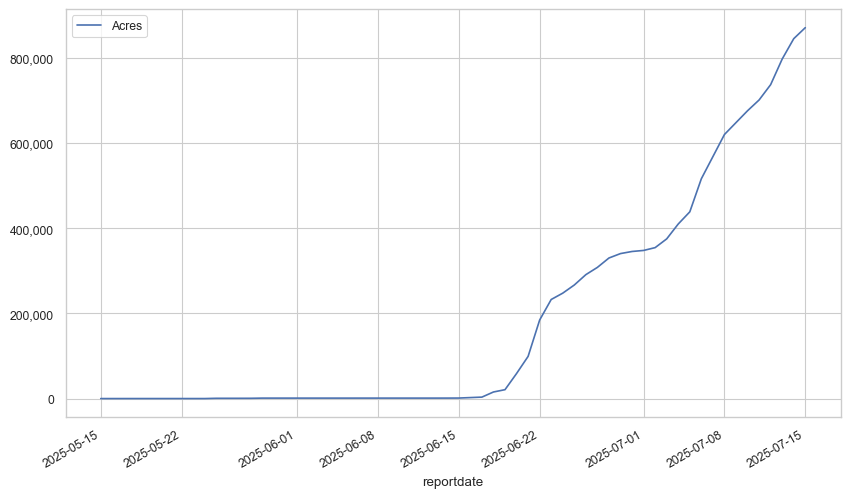

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
dailyarea.loc['2025-05-14':].plot(ax=ax)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
# ax.xaxis.grid(False)
# xticks = pd.date_range(start=dailyarea.index.min(), end=dailyarea.index.max(), freq='SMS')
# ax.set_xticks(xticks.map(lambda d: dailystrikes.index.get_loc(d)))
# ax.set_xticklabels(xticks.strftime('%d %b %Y'), rotation=45, ha='right')

/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_90220/2922720924.py:2: UserWarning: The palette list has more values (256) than needed (13), which may not be intended.
  sns.lineplot(data=dailyarea_by_Zone.loc['2025-05-14':], x='reportdate', y='Acres',


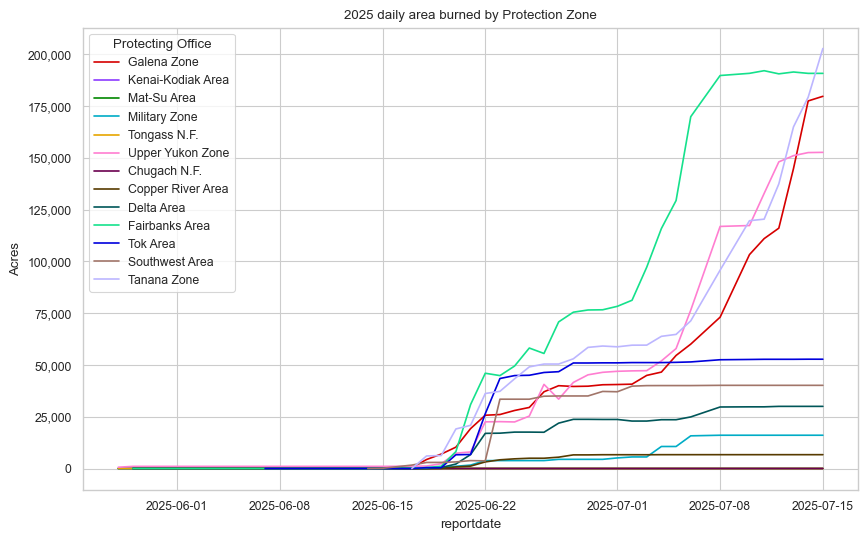

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=dailyarea_by_Zone.loc['2025-05-14':], x='reportdate', y='Acres', 
             hue='Protecting Office', ax=ax, palette=sns.color_palette(cc.glasbey_dark))
plt.title("2025 daily area burned by Protection Zone")
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

## By PSA

In [ ]:
testrow = all_updates.iloc[4]

def get_psa(row):
    return Point(row.Longitude, row.Latitude)

In [ ]:
geometry = gp.points_from_xy(all_updates['Longitude'], all_updates['Latitude'])
all_updates_GDF = gp.GeoDataFrame(all_updates, geometry=geometry, crs="EPSG:4326")

In [ ]:
psafp = Path().absolute().parents[0] / "resources/AK_predictive_service_areas.json"
psa_GDF = gp.read_file(psafp)
psa_GDF.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
joined_GDF = gp.sjoin(all_updates_GDF, psa_GDF, predicate='within', how='inner')

In [ ]:
joined_GDF

,Fire Number,Unique Fire ID,Incident Name,Acres,Fire Cause,Incident Type,Management Option,Protecting Org,Protecting Office,Owner ID,...,Discovery date,Control date,Out date,Protecting Office Label,geometry,index_right,GACC,PSA_NAME,NAT_CODE,ID
37,5.0,2025-AKMSS-501005,Bergman,0.70,Human,WF-Wildfire,Critical,DOF,Mat-Su Area,Private,...,2025-03-21 12:32:42,2025-03-21 17:39:00,2025-03-25 14:41:00,MSS,POINT (-149.01561 61.5487),4,Alaska,Matanuska Valley and Anchorage,AK13,4
28,13.0,2025-AKKKS-503013,Hoyt,0.50,Human,WF-Wildfire,Critical,DOF,Kenai-Kodiak Area,Private,...,2025-03-30 13:14:00,2025-03-30 15:27:00,2025-04-04 16:20:00,KKS,POINT (-151.31247 60.64222),5,Alaska,Kenai Peninsula,AK14,5
29,12.0,2025-AKMSS-501012,Ridgewood,0.10,Human,WF-Wildfire,Critical,DOF,Mat-Su Area,Private,...,2025-03-30 12:00:42,2025-03-30 12:12:00,2025-03-30 13:33:00,MSS,POINT (-149.50556 61.60257),4,Alaska,Matanuska Valley and Anchorage,AK13,4
32,9.0,2025-AKMSS-501009,Down Wind,0.30,Natural,WF-Wildfire,Critical,DOF,Mat-Su Area,Private,...,2025-03-27 15:31:00,2025-03-27 16:26:00,2025-04-04 16:42:00,MSS,POINT (-149.30358 61.56639),4,Alaska,Matanuska Valley and Anchorage,AK13,4
33,8.0,2025-AKMSS-501008,Baron,0.10,Human,WF-Wildfire,Critical,DOF,Mat-Su Area,Private,...,2025-03-27 14:28:00,2025-03-27 14:59:00,2025-03-27 16:03:00,MSS,POINT (-149.27758 61.63419),4,Alaska,Matanuska Valley and Anchorage,AK13,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,344.0,2025-AKUYD-000344,Otter,101.29,Natural,WF-Wildfire,Full,AFS,Upper Yukon Zone,ANCSA,...,NaT,NaT,NaT,UYD,POINT (-145.20917 67.55083),12,Alaska,Upper Yukon Valley,AK02,12
113,345.0,2025-AKGAD-000345,Tituluk,2.67,Natural,WF-Wildfire,Limited,AFS,Galena Zone,BLM,...,NaT,NaT,NaT,GAD,POINT (-155.32735 69.62718),15,Alaska,North Slope,AK00,15
112,346.0,2025-AKGAD-000346,Taluk,7.70,Natural,WF-Wildfire,Limited,AFS,Galena Zone,BLM,...,NaT,NaT,NaT,GAD,POINT (-155.38343 69.44637),15,Alaska,North Slope,AK00,15
111,347.0,2025-AKGAD-000347,Stoat,745.80,Natural,WF-Wildfire,Limited,AFS,Galena Zone,BLM,...,NaT,NaT,NaT,GAD,POINT (-157.8221 66.59668),9,Alaska,Koyukuk and Upper Kobuk,AK04,9


In [ ]:
joined_GDF['point_index'] = joined_GDF.index

In [ ]:
first_polygons = joined_GDF.groupby('point_index').first()

In [ ]:
first_polygons = first_polygons.reset_index()
first_polygons

,point_index,Fire Number,Unique Fire ID,Incident Name,Acres,Fire Cause,Incident Type,Management Option,Protecting Org,Protecting Office,...,Discovery date,Control date,Out date,Protecting Office Label,geometry,index_right,GACC,PSA_NAME,NAT_CODE,ID
0,0,34.0,2025-AKTNF-000034,Strawberry,0.1,Human,WF-Wildfire,Critical,USFS,Tongass N.F.,...,2025-04-20 08:14:00,2025-04-20 08:32:00,2025-04-23 14:33:00,TNF,POINT (-139.58639 59.44917),1,Alaska,Northern Panhandle,AK15,1
1,1,31.0,2025-AKKKS-503031,Lake,0.1,Human,WF-Wildfire,Critical,DOF,Kenai-Kodiak Area,...,2025-04-16 16:56:00,2025-04-16 17:44:00,NaT,KKS,POINT (-150.73641 60.50239),5,Alaska,Kenai Peninsula,AK14,5
2,2,30.0,2025-AKKKS-503030,Morraine Vista,0.1,Human,WF-Wildfire,Critical,DOF,Kenai-Kodiak Area,...,2025-04-16 12:47:00,2025-04-16 13:26:00,2025-04-23 14:33:00,KKS,POINT (-151.24655 60.33268),5,Alaska,Kenai Peninsula,AK14,5
3,3,29.0,2025-AKKKS-503029,Midway,0.1,Human,WF-Wildfire,Critical,DOF,Kenai-Kodiak Area,...,2025-04-16 12:21:04,2025-04-16 13:56:00,2025-04-22 13:42:00,KKS,POINT (-150.73624 60.51952),5,Alaska,Kenai Peninsula,AK14,5
4,4,28.0,2025-AKDAS-512028,Dog Motel,0.1,Human,WF-Wildfire,Critical,DOF,Delta Area,...,2025-04-16 12:01:53,2025-04-16 12:52:00,2025-04-16 12:52:00,DAS,POINT (-145.8233 64.14227),6,Alaska,Tanana Valley-West,AK01W,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,475,78.0,2025-AKTNF-000078,Sawmill Creek,0.2,Human,WF-Wildfire,Critical,USFS,Tongass N.F.,...,NaT,NaT,NaT,TNF,POINT (-135.31139 57.04806),2,Alaska,Central Panhandle,AK16,2
476,476,3.0,2025-AKKKS-503003,Venture,0.1,Human,WF-Wildfire,Critical,DOF,Kenai-Kodiak Area,...,NaT,NaT,NaT,KKS,POINT (-151.7895 59.86217),5,Alaska,Kenai Peninsula,AK14,5
477,477,2.0,2025-AKMSS-501002,Sasbo Bluff,1.2,Human,WF-Wildfire,Critical,DOF,Mat-Su Area,...,NaT,NaT,NaT,MSS,POINT (-149.63728 61.63547),4,Alaska,Matanuska Valley and Anchorage,AK13,4
478,480,78.0,2025-AKTNF-000078,Sawmill Creek,0.2,Human,WF-Wildfire,Critical,USFS,Tongass N.F.,...,NaT,NaT,NaT,TNF,POINT (-135.31139 57.04806),2,Alaska,Central Panhandle,AK16,2


In [ ]:
joined_GDF.drop(columns=['index_right', 'GACC', 'ID'], inplace=True)
joined_GDF

,Fire Number,Unique Fire ID,Incident Name,Acres,Fire Cause,Incident Type,Management Option,Protecting Org,Protecting Office,Owner ID,...,Longitude,reportdate,Discovery date,Control date,Out date,Protecting Office Label,geometry,PSA_NAME,NAT_CODE,point_index
37,5.0,2025-AKMSS-501005,Bergman,0.70,Human,WF-Wildfire,Critical,DOF,Mat-Su Area,Private,...,-149.015612,2025-04-22,2025-03-21 12:32:42,2025-03-21 17:39:00,2025-03-25 14:41:00,MSS,POINT (-149.01561 61.5487),Matanuska Valley and Anchorage,AK13,37
28,13.0,2025-AKKKS-503013,Hoyt,0.50,Human,WF-Wildfire,Critical,DOF,Kenai-Kodiak Area,Private,...,-151.312472,2025-04-22,2025-03-30 13:14:00,2025-03-30 15:27:00,2025-04-04 16:20:00,KKS,POINT (-151.31247 60.64222),Kenai Peninsula,AK14,28
29,12.0,2025-AKMSS-501012,Ridgewood,0.10,Human,WF-Wildfire,Critical,DOF,Mat-Su Area,Private,...,-149.505564,2025-04-22,2025-03-30 12:00:42,2025-03-30 12:12:00,2025-03-30 13:33:00,MSS,POINT (-149.50556 61.60257),Matanuska Valley and Anchorage,AK13,29
32,9.0,2025-AKMSS-501009,Down Wind,0.30,Natural,WF-Wildfire,Critical,DOF,Mat-Su Area,Private,...,-149.303583,2025-04-22,2025-03-27 15:31:00,2025-03-27 16:26:00,2025-04-04 16:42:00,MSS,POINT (-149.30358 61.56639),Matanuska Valley and Anchorage,AK13,32
33,8.0,2025-AKMSS-501008,Baron,0.10,Human,WF-Wildfire,Critical,DOF,Mat-Su Area,Private,...,-149.277583,2025-04-22,2025-03-27 14:28:00,2025-03-27 14:59:00,2025-03-27 16:03:00,MSS,POINT (-149.27758 61.63419),Matanuska Valley and Anchorage,AK13,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,344.0,2025-AKUYD-000344,Otter,101.29,Natural,WF-Wildfire,Full,AFS,Upper Yukon Zone,ANCSA,...,-145.209167,2025-07-15,NaT,NaT,NaT,UYD,POINT (-145.20917 67.55083),Upper Yukon Valley,AK02,114
113,345.0,2025-AKGAD-000345,Tituluk,2.67,Natural,WF-Wildfire,Limited,AFS,Galena Zone,BLM,...,-155.327350,2025-07-15,NaT,NaT,NaT,GAD,POINT (-155.32735 69.62718),North Slope,AK00,113
112,346.0,2025-AKGAD-000346,Taluk,7.70,Natural,WF-Wildfire,Limited,AFS,Galena Zone,BLM,...,-155.383433,2025-07-15,NaT,NaT,NaT,GAD,POINT (-155.38343 69.44637),North Slope,AK00,112
111,347.0,2025-AKGAD-000347,Stoat,745.80,Natural,WF-Wildfire,Limited,AFS,Galena Zone,BLM,...,-157.822100,2025-07-15,NaT,NaT,NaT,GAD,POINT (-157.8221 66.59668),Koyukuk and Upper Kobuk,AK04,111


In [ ]:
psa_GDF

,GACC,PSA_NAME,NAT_CODE,ID,geometry
0,Alaska,Kuskokwim Valley,AK09,0,"POLYGON ((-153.92177 63.67527, -153.91623 63.6..."
1,Alaska,Northern Panhandle,AK15,1,"MULTIPOLYGON (((-139.14622 60.18395, -139.1744..."
2,Alaska,Central Panhandle,AK16,2,"MULTIPOLYGON (((-133.79152 58.68218, -133.6967..."
3,Alaska,Southern Panhandle,AK17,3,"MULTIPOLYGON (((-132.25778 57.20999, -132.3713..."
4,Alaska,Matanuska Valley and Anchorage,AK13,4,"MULTIPOLYGON (((-148.28488 62.34603, -148.2766..."
5,Alaska,Kenai Peninsula,AK14,5,"MULTIPOLYGON (((-148.4281 61.08596, -148.42019..."
6,Alaska,Tanana Valley-West,AK01W,6,"POLYGON ((-145.15266 63.30788, -145.16102 63.3..."
7,Alaska,Susitna Valley,AK11,7,"MULTIPOLYGON (((-147.56895 63.55131, -147.5627..."
8,Alaska,Tanana Zone-South,AK03S,8,"POLYGON ((-149.71597 65.84884, -149.70732 65.8..."
9,Alaska,Koyukuk and Upper Kobuk,AK04,9,"MULTIPOLYGON (((-165.85467 68.7508, -162.92999..."


In [ ]:
dailyarea_NS = joined_GDF.query('PSA_NAME == "North Slope"')[['reportdate', 'Acres']].resample('D', on='reportdate').sum()
dailyarea_NS['Acres'] = dailyarea_NS['Acres'].replace(0, pd.NA)
dailyarea_NS.dropna(inplace=True)

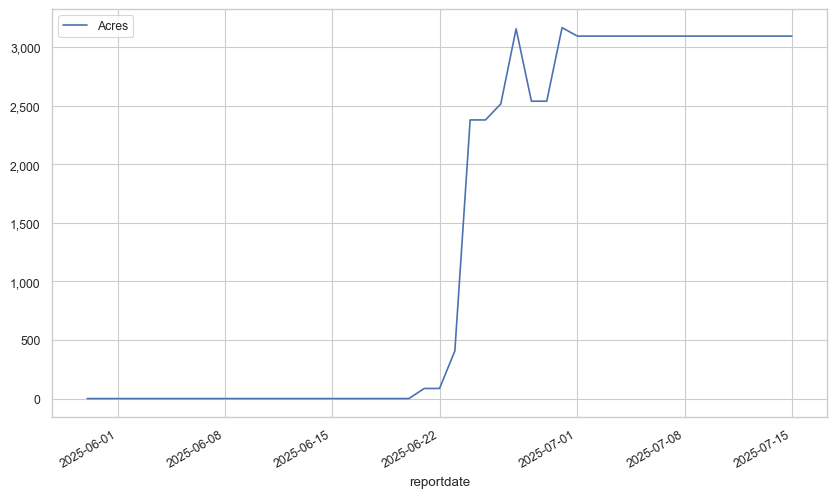

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
dailyarea_NS.loc['2025-05-15':].plot(ax=ax)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

In [ ]:
dailyarea_TVW = joined_GDF.query('PSA_NAME == "Tanana Valley-West"')[['reportdate', 'Acres']].resample('D', on='reportdate').sum()
dailyarea_TVW['Acres'] = dailyarea_TVW['Acres'].replace(0, pd.NA)
dailyarea_TVW.dropna(inplace=True)

Text(0.5, 1.0, 'Tanana Valley-West, 2025')

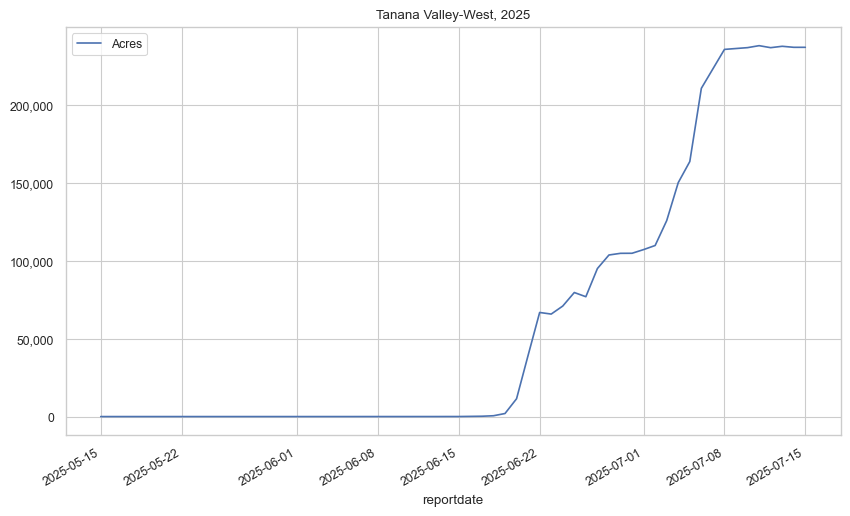

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
dailyarea_TVW.loc['2025-05-15':].plot(ax=ax)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_title("Tanana Valley-West, 2025")

In [ ]:
joined_GDF.columns

Index(['Fire Number', 'Unique Fire ID', 'Incident Name', 'Acres', 'Fire Cause',
       'Incident Type', 'Management Option', 'Protecting Org',
       'Protecting Office', 'Owner ID', 'Ownership at Origin',
       'Discovery Date', 'Containment Date', 'Control Date', 'Out Date',
       'Fire Code', 'DOF Code', 'USFS Code', 'Complex', 'Last updated',
       'Status', 'Personnel ', 'Narrative Date', 'Narrative', 'Latitude',
       'Longitude', 'reportdate', 'Discovery date', 'Control date', 'Out date',
       'Protecting Office Label', 'geometry', 'PSA_NAME', 'NAT_CODE',
       'point_index'],
      dtype='object')

In [ ]:
dailyarea_byPSA = joined_GDF[['reportdate', 'Acres', 'PSA_NAME', 'NAT_CODE']].groupby(['reportdate', 'PSA_NAME', 'NAT_CODE']).sum().reset_index()

In [ ]:
dailyarea_byPSA

,reportdate,PSA_NAME,NAT_CODE,Acres
0,2025-04-22,Central Panhandle,AK16,0.10
1,2025-04-22,Kenai Peninsula,AK14,1.41
2,2025-04-22,Matanuska Valley and Anchorage,AK13,3.21
3,2025-04-22,Northern Panhandle,AK15,0.10
4,2025-04-22,Tanana Valley-West,AK01W,0.21
...,...,...,...,...
837,2025-07-15,Tanana Valley-West,AK01W,236788.50
838,2025-07-15,Tanana Zone-North,AK03N,131345.10
839,2025-07-15,Tanana Zone-South,AK03S,71108.57
840,2025-07-15,Upper Yukon Valley,AK02,152412.16


In [ ]:
custom_palette = sns.color_palette("viridis", 24)

In [ ]:
big_fires_PSAS = dailyarea_byPSA[dailyarea_byPSA.Acres > 1000].sort_values('Acres', ascending=False).drop_duplicates('PSA_NAME').PSA_NAME.to_list()
big_fires_PSAS

['Tanana Valley-West',
 'Upper Yukon Valley',
 'Tanana Zone-North',
 'Middle Yukon',
 'Tanana Zone-South',
 'Koyukuk and Upper Kobuk',
 'Tanana Valley-East',
 'Lower Yukon',
 'Copper River Basin',
 'Kuskokwim Valley',
 'Seward Peninsula',
 'North Slope']

In [ ]:
dailyarea_byPSA_forplot = dailyarea_byPSA[dailyarea_byPSA.PSA_NAME.isin(big_fires_PSAS)].loc['2025-05-15':]
dailyarea_byPSA_forplot.PSA_NAME = dailyarea_byPSA_forplot.PSA_NAME.astype("category")
dailyarea_byPSA_forplot.PSA_NAME = dailyarea_byPSA_forplot.PSA_NAME.cat.set_categories(big_fires_PSAS)
dailyarea_byPSA_forplot.sort_values("PSA_NAME", inplace=True)

/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_90220/37655317.py:2: UserWarning: The palette list has more values (21) than needed (12), which may not be intended.
  sns.lineplot(data=dailyarea_byPSA_forplot, x='reportdate', y='Acres',


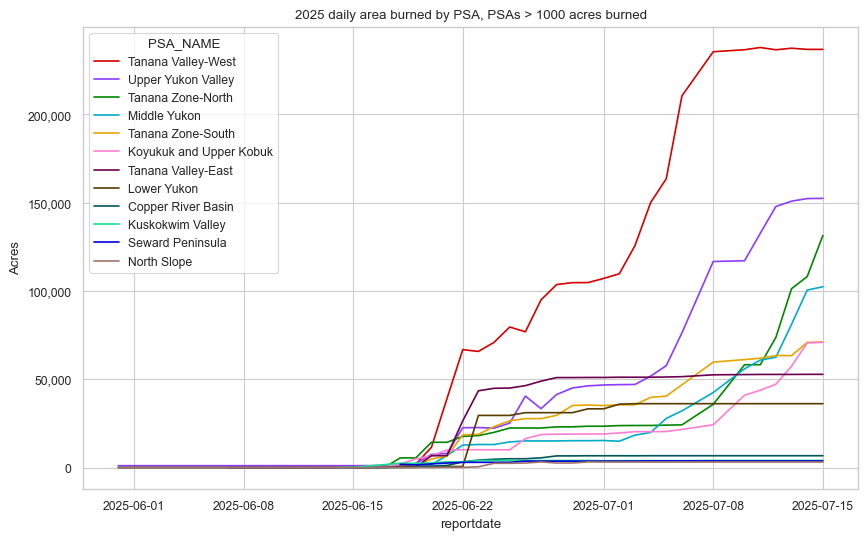

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=dailyarea_byPSA_forplot, x='reportdate', y='Acres', 
             hue='PSA_NAME', ax=ax, palette=sns.color_palette(cc.glasbey_dark, n_colors=len(psa_GDF)))
plt.title("2025 daily area burned by PSA, PSAs > 1000 acres burned")
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

In [ ]:
dailyarea_byPSA_forplot

,reportdate,PSA_NAME,NAT_CODE,Acres
585,2025-06-29,Tanana Valley-West,AK01W,104683.48
621,2025-07-01,Tanana Valley-West,AK01W,107079.45
297,2025-06-10,Tanana Valley-West,AK01W,12.42
801,2025-07-13,Tanana Valley-West,AK01W,237448.37
308,2025-06-11,Tanana Valley-West,AK01W,12.52
...,...,...,...,...
796,2025-07-13,North Slope,AK00,3095.05
304,2025-06-11,North Slope,AK00,0.06
760,2025-07-11,North Slope,AK00,3095.05
338,2025-06-14,North Slope,AK00,0.06


In [ ]:
olddatafp = Path().absolute().parent / "resources/AICC_Daily_Stats_2004_to_Present.csv"
olddatafp.exists()

True

In [ ]:
olddata = pd.read_csv(olddatafp, skiprows=2)
dropcols = [col for col in olddata.columns if col.startswith('Unname')] 
olddata.drop(columns=dropcols+['ID'], inplace=True)
intcols = list(olddata.columns.difference(['TotalAcres', 'ProtectionUnit', 'SitReportDate']))
for col in intcols:
    if olddata[col].isna().any():
        olddata.drop(columns=[col], inplace=True)
    else:
        olddata[col] = olddata[col].astype(int)
olddata.rename(columns={'FireSeason': 'Year'}, inplace=True)
olddata['reportdate'] = pd.to_datetime(olddata[['Year', 'Month', 'Day']])
olddata.drop(columns=['SitReportDate'], inplace=True)
# olddata[intcols] = olddata[intcols].dropna(axis=1)


olddata

,Year,Month,Day,ProtectionUnit,TotalFires,TotalAcres,reportdate
0,2004,4,20,MID,1,1.0,2004-04-20
1,2004,4,20,DAS,1,0.1,2004-04-20
2,2004,4,20,FAS,1,0.1,2004-04-20
3,2004,4,20,MSS,1,0.8,2004-04-20
4,2004,4,27,MID,1,0.1,2004-04-27
...,...,...,...,...,...,...,...
35788,2024,9,27,MSS,40,169.0,2024-09-27
35789,2024,9,27,SWS,44,49915.0,2024-09-27
35790,2024,9,27,TAS,24,21379.0,2024-09-27
35791,2024,9,27,CGF,3,0.3,2024-09-27


In [ ]:
olddata.drop(columns=['Month', 'Day', 'TotalFires', 'ProtectionUnit'], inplace=True)
olddata = olddata.groupby(['reportdate', 'Year']).sum().reset_index()
olddata.rename({'TotalAcres': 'Acres'}, axis=1, inplace=True)
olddata

,reportdate,Year,Acres
0,2004-04-20,2004,2.0
1,2004-04-27,2004,26.5
2,2004-04-28,2004,27.6
3,2004-04-30,2004,27.7
4,2004-05-03,2004,30.3
...,...,...,...
3010,2024-09-19,2024,665808.4
3011,2024-09-20,2024,666332.4
3012,2024-09-24,2024,665879.4
3013,2024-09-26,2024,666700.4


In [ ]:
dailyarea_by_Zone['Year'] = dailyarea_by_Zone.reportdate.dt.year
dailyarea_by_Zone

,reportdate,Protecting Office,Protecting Office Label,Acres,Year
0,2025-04-22,Delta Area,DAS,0.10,2025
1,2025-04-22,Kenai-Kodiak Area,KKS,1.41,2025
2,2025-04-22,Mat-Su Area,MSS,3.21,2025
3,2025-04-22,Military Zone,MID,0.11,2025
4,2025-04-22,Tongass N.F.,TNF,0.20,2025
...,...,...,...,...,...
736,2025-07-15,Southwest Area,SWS,40147.66,2025
737,2025-07-15,Tanana Zone,TAD,202730.67,2025
738,2025-07-15,Tok Area,TAS,52756.05,2025
739,2025-07-15,Tongass N.F.,TNF,0.70,2025


In [ ]:
dailyarea['Year'] = dailyarea.index.year

In [ ]:
dailyarea.reset_index(inplace=True)
dailyarea

,reportdate,Acres,Year
0,2025-04-22,5.03,2025
1,2025-04-23,5.03,2025
2,2025-04-24,5.14,2025
3,2025-04-25,5.44,2025
4,2025-04-28,5.74,2025
...,...,...,...
67,2025-07-11,701516.79,2025
68,2025-07-12,737527.73,2025
69,2025-07-13,797732.23,2025
70,2025-07-14,845547.52,2025


In [ ]:
olddata

,reportdate,Year,Acres
0,2004-04-20,2004,2.0
1,2004-04-27,2004,26.5
2,2004-04-28,2004,27.6
3,2004-04-30,2004,27.7
4,2004-05-03,2004,30.3
...,...,...,...
3010,2024-09-19,2024,665808.4
3011,2024-09-20,2024,666332.4
3012,2024-09-24,2024,665879.4
3013,2024-09-26,2024,666700.4


In [ ]:
all_data_daily = pd.concat([olddata, dailyarea])
all_data_daily

,reportdate,Year,Acres
0,2004-04-20,2004,2.00
1,2004-04-27,2004,26.50
2,2004-04-28,2004,27.60
3,2004-04-30,2004,27.70
4,2004-05-03,2004,30.30
...,...,...,...
67,2025-07-11,2025,701516.79
68,2025-07-12,2025,737527.73
69,2025-07-13,2025,797732.23
70,2025-07-14,2025,845547.52


In [ ]:
additional = []
for yr in olddata.Year.unique():
    totalforyear = all_data_daily.query(f'Year =={yr}').Acres.max()
    print(yr, totalforyear)
    additional.append([dt.datetime(yr, 12, 1), yr, totalforyear])

augmentedDF = pd.concat([all_data_daily, pd.DataFrame.from_records(additional)], axis=1)

2004 6724048.0
2005 4609269.3
2006 266258.7
2007 649410.7999999999
2009 2951593.0
2010 1133593.2
2011 293019.1
2013 1321035.2000000002
2014 233529.30000000002
2015 5149424.9
2016 500794.19999999995
2017 653157.7
2018 411211.8
2019 2681141.6
2020 359378.0
2021 255427.1
2022 3114023.5
2023 295767.1
2024 667479.4


In [ ]:
augmentedDF

,reportdate,Year,Acres,0,1,2
0,2004-04-20,2004,2.00,2004-12-01,2004.0,6724048.0
1,2004-04-27,2004,26.50,2005-12-01,2005.0,4609269.3
2,2004-04-28,2004,27.60,2006-12-01,2006.0,266258.7
3,2004-04-30,2004,27.70,2007-12-01,2007.0,649410.8
4,2004-05-03,2004,30.30,2009-12-01,2009.0,2951593.0
...,...,...,...,...,...,...
67,2025-07-11,2025,701516.79,NaT,NaN,NaN
68,2025-07-12,2025,737527.73,NaT,NaN,NaN
69,2025-07-13,2025,797732.23,NaT,NaN,NaN
70,2025-07-14,2025,845547.52,NaT,NaN,NaN


In [ ]:
all_data_daily['reportdate'] = all_data_daily.reportdate.map(lambda t: t.replace(year=2025))

In [ ]:
year = 2016

all_data_daily.query(f'Year == {year}')

,reportdate,Year,Acres
1544,2025-02-23,2016,1.0
1545,2025-02-24,2016,1.0
1546,2025-02-25,2016,1.2
1547,2025-03-01,2016,1.3
1548,2025-03-02,2016,1.3
...,...,...,...
1703,2025-09-26,2016,500139.8
1704,2025-09-27,2016,500110.9
1705,2025-09-28,2016,500140.9
1706,2025-09-29,2016,500140.9


In [ ]:
big_fires_years = all_data_daily[all_data_daily.Acres > 600000].sort_values('Acres', ascending=False).drop_duplicates('Year').Year.to_list()
all_data_daily_forplot = all_data_daily[all_data_daily.Year.isin(big_fires_years)]
# all_data_daily_forplot.PSA_NAME = dailyarea_byPSA_forplot.PSA_NAME.astype("category")
# dailyarea_byPSA_forplot.PSA_NAME = dailyarea_byPSA_forplot.PSA_NAME.cat.set_categories(big_fires_PSAS)
# dailyarea_byPSA_forplot.sort_values("PSA_NAME", inplace=True)


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_90220/4072776309.py:2: UserWarning: The palette list has more values (256) than needed (12), which may not be intended.
  sns.lineplot(data=all_data_daily_forplot, x='reportdate', y='Acres',


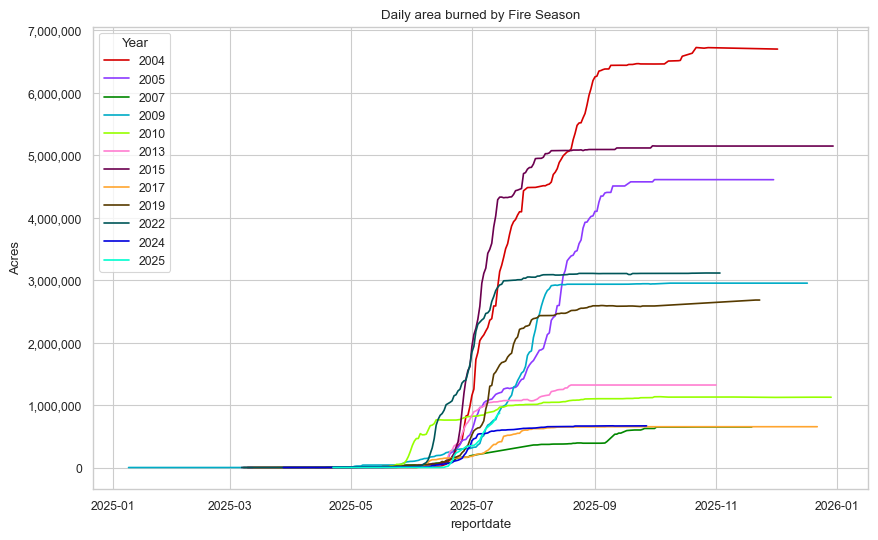

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=all_data_daily_forplot, x='reportdate', y='Acres', 
             hue='Year', ax=ax, palette=sns.color_palette(cc.glasbey))
plt.title("Daily area burned by Fire Season")
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

In [ ]:
olddata.query("Year == 2022")

,Year,TotalAcres,reportdate
30360,2022,0,2022-03-07
30361,2022,0,2022-04-11
30362,2022,0,2022-04-11
30363,2022,0,2022-04-12
30364,2022,0,2022-04-12
...,...,...,...
32535,2022,133,2022-11-03
32536,2022,1364498,2022-11-03
32537,2022,2468,2022-11-03
32538,2022,9,2022-11-03
